In [1]:
%matplotlib inline
from city_network.citygrid import CityGrid
import matplotlib as plt

# Set figure size for notebook
plt.rcParams["figure.figsize"] = 12, 9

Several example grids are created.

In [2]:
example1 = CityGrid(30, 30, seed=42)
example2 = CityGrid(30, 10, seed=42)
example3 = CityGrid(10, 30, seed=42)
example4 = CityGrid(20, 20, seed=42)

The following is a visualization of example4's obstructions.

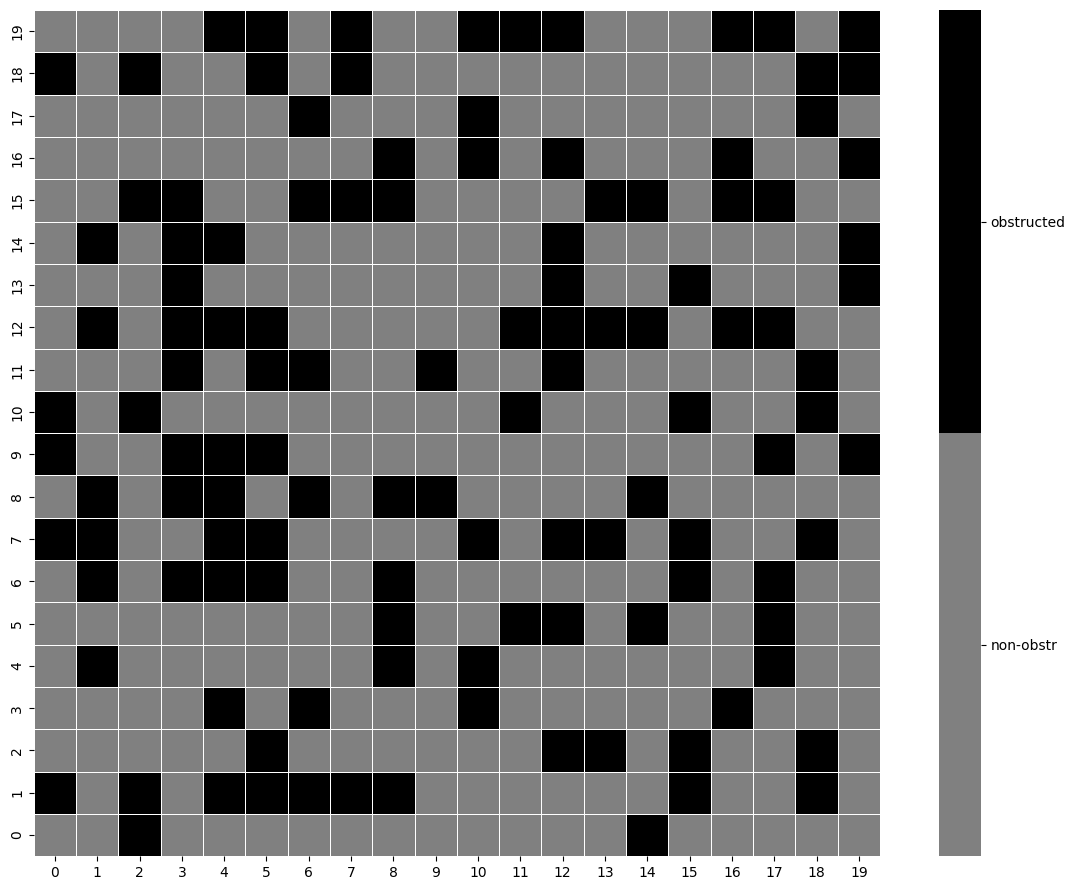

In [3]:
example4.visualize_obstructions()

A tower can be placed, and its coverage visualized, by hand (if so desired).

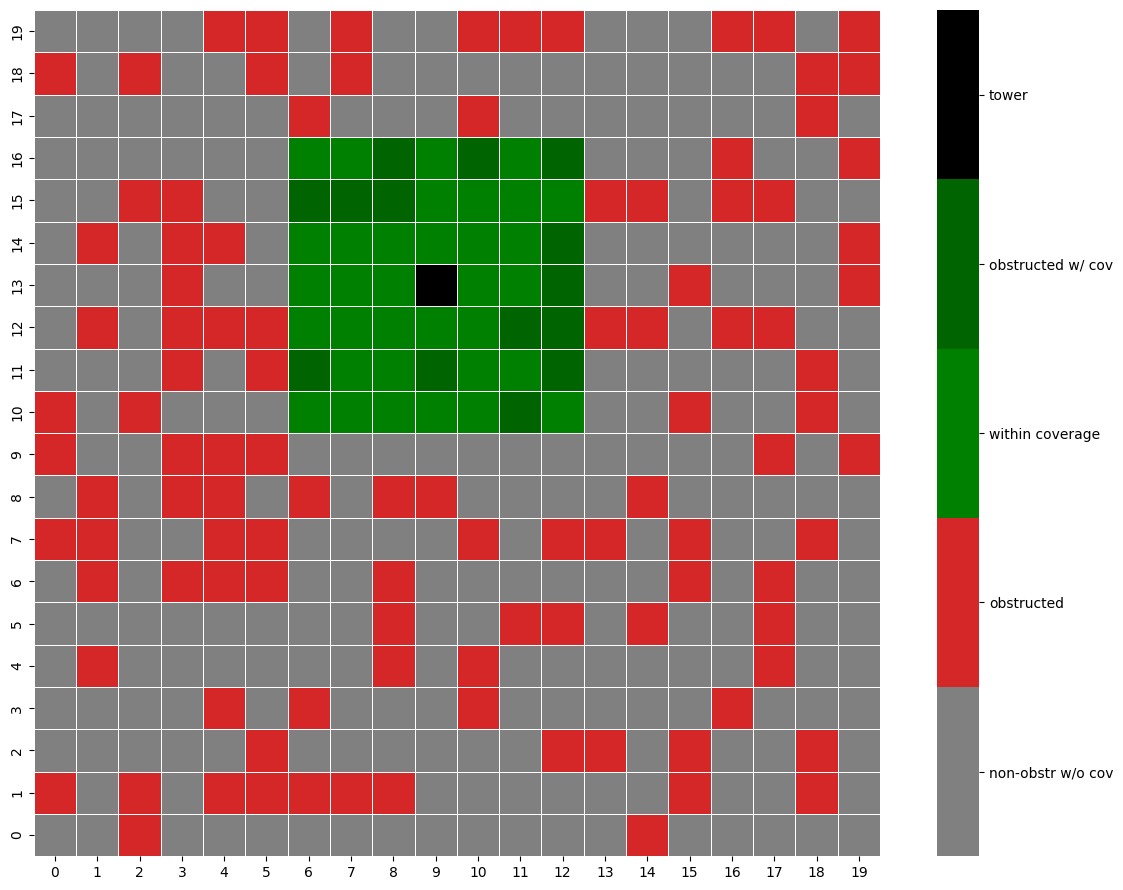

In [4]:
example4.place_tower(9, 13, tower_range=3, display=True)

To automatically place the minimum number of towers required to cover all of non-obstructed
blocks execute the `optimize_tower_placement` method with the desired radius.

In [5]:
example1.optimize_tower_placement(2)
example2.optimize_tower_placement(2)
example3.optimize_tower_placement(2)

Tower placements can be visualized either with `visualize_grid` or `visualize_towers`.

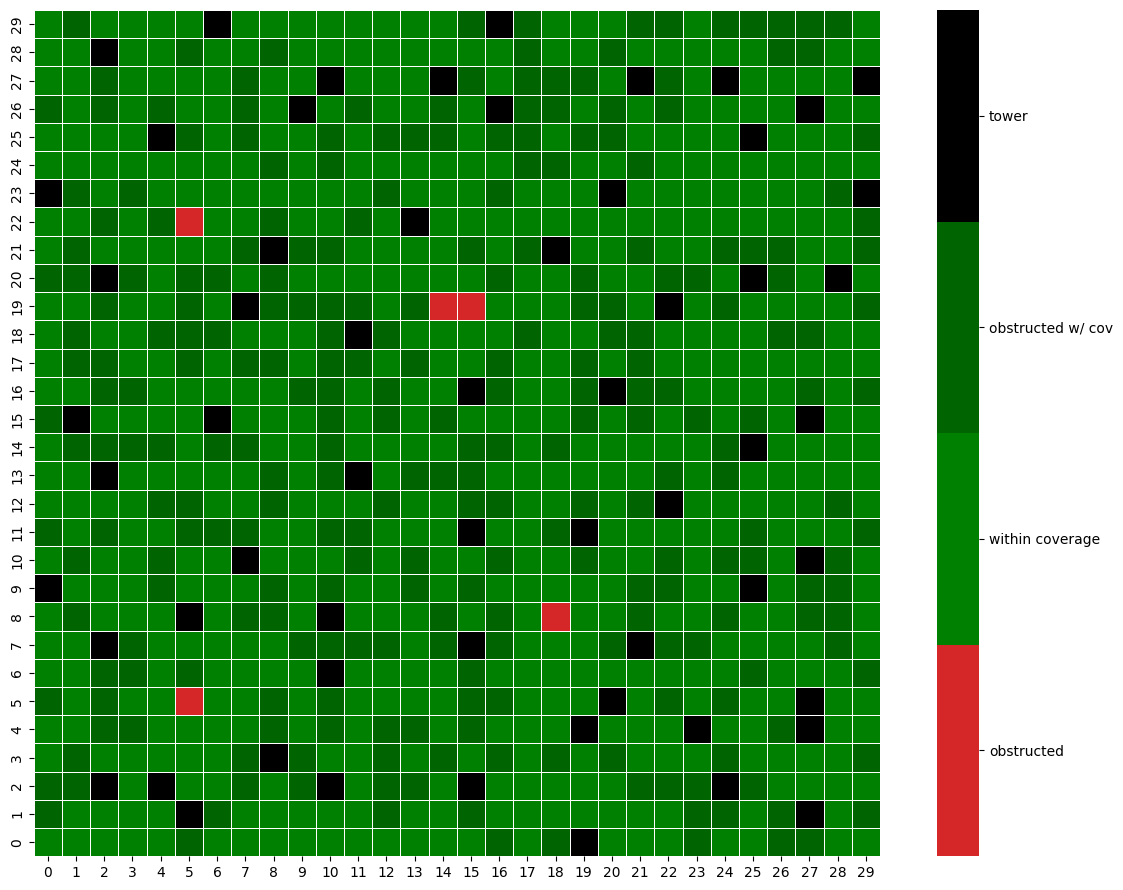

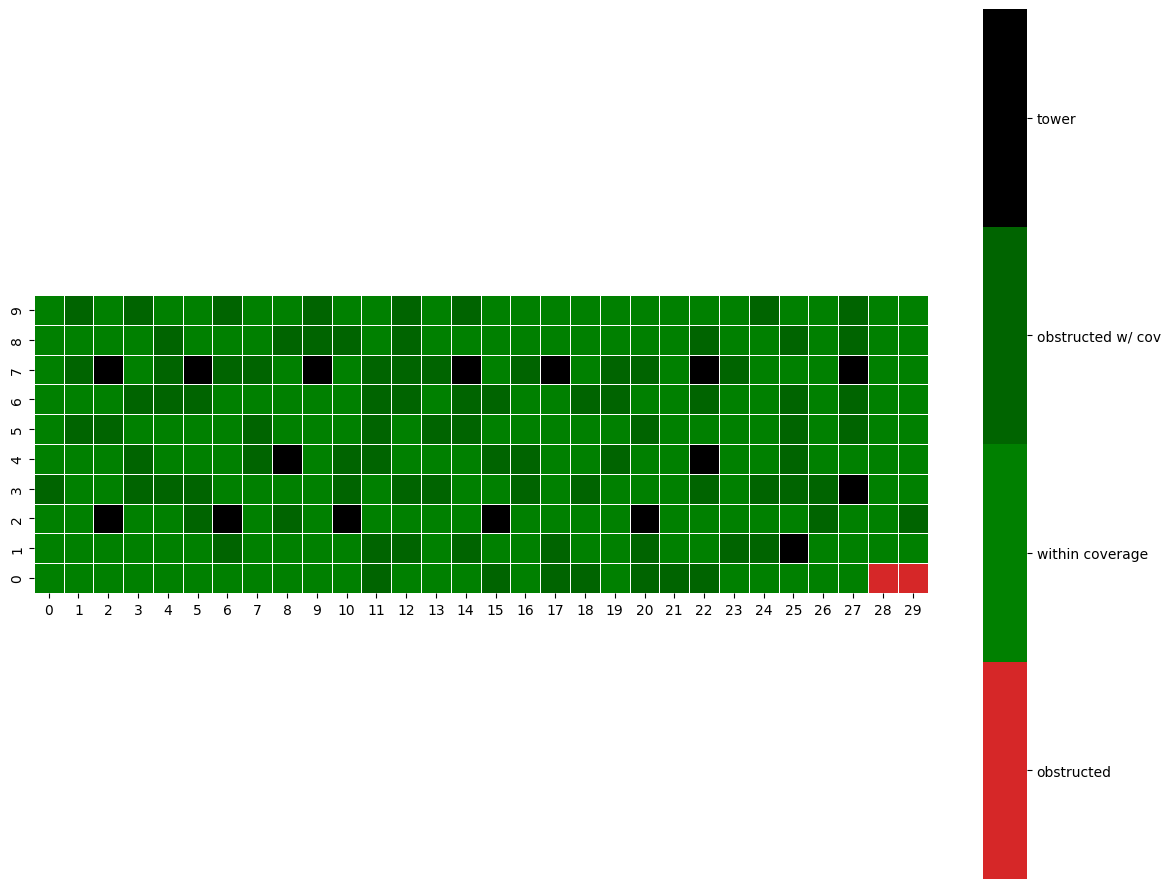

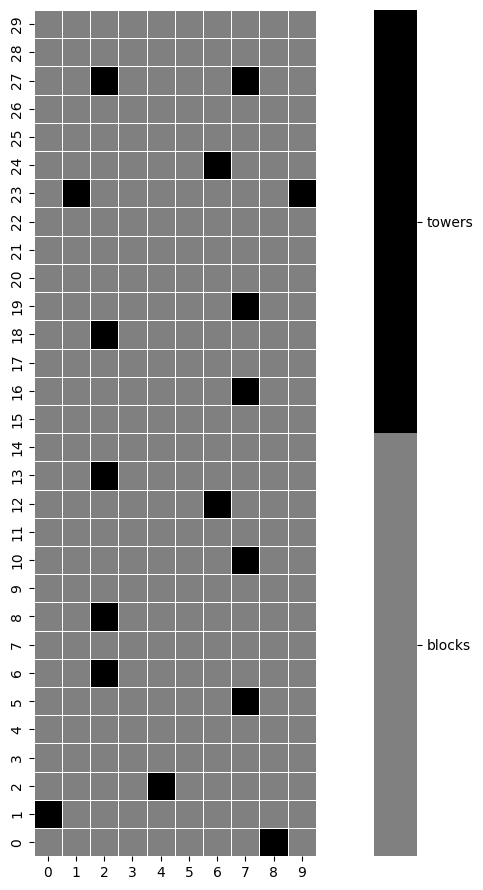

In [6]:
example1.visualize_grid()
example2.visualize_grid()
example3.visualize_towers()

The most reliable path between two towers can be found by executing `most_reliable_path` with the `(x, y)` coordinates of both towers and their range.  
Considering the nature of the tower placement optimization algorithm, towers will not be in direct range of each other (in order to minimize overlap), meaning that they can't directly communicate with each other.  
For illustration's sake, example4 is populated with towers in relatively close range of each other.  
P.s. this makes little sense as in real life towers are connected by wire, so their proximity doesn't actually matter.  

In [7]:
# Populate with towers
example4.place_tower(3, 2, 3)
example4.place_tower(4, 5, 3)
example4.place_tower(7, 7, 3)
example4.place_tower(6, 10, 3)
example4.place_tower(9, 10, 3)
example4.place_tower(11, 7, 3)
example4.place_tower(14, 6, 3)
example4.place_tower(12, 15, 3)
example4.place_tower(13, 18, 3)
example4.place_tower(16, 18, 3)
example4.place_tower(19, 17, 3)
example4.place_tower(5, 13, 3)
example4.place_tower(9, 7, 3)

When a path is determined, the optimal path is printed out, and all optimal paths starting with the first tower are stored.

In [8]:
example4.most_reliable_path((3, 2), (14, 6), 3)

Most reliable path: [(3, 2), (4, 5), (7, 7), (9, 7), (11, 7), (14, 6)]


All optimal paths starting from the tower can be visualized.

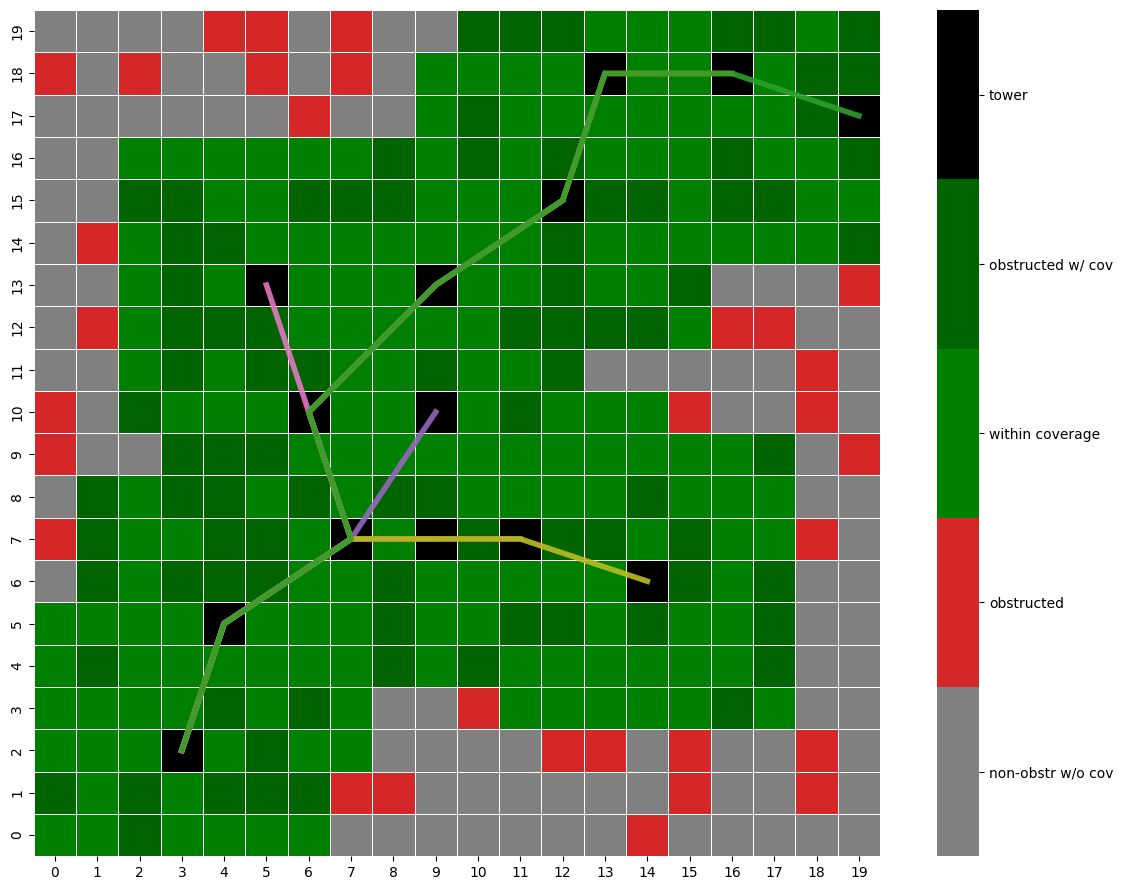

In [9]:
example4.visualize_grid(paths="all")

More paths can be searched for.

In [10]:
example4.most_reliable_path((3, 2), (14, 6), 3)
example4.most_reliable_path((5, 13), (3, 2), 3)
example4.most_reliable_path((19, 17), (5, 13), 3)
example4.most_reliable_path((14, 6), (19, 17), 3)

Most reliable path: [(3, 2), (4, 5), (7, 7), (9, 7), (11, 7), (14, 6)]
Most reliable path: [(3, 2), (4, 5), (7, 7), (6, 10), (5, 13)]
Most reliable path: [(19, 17), (16, 18), (13, 18), (12, 15), (9, 13), (6, 10), (5, 13)]
Most reliable path: [(19, 17), (16, 18), (13, 18), (12, 15), (9, 13), (9, 10), (11, 7), (14, 6)]


Individual optimal paths can be visualized.

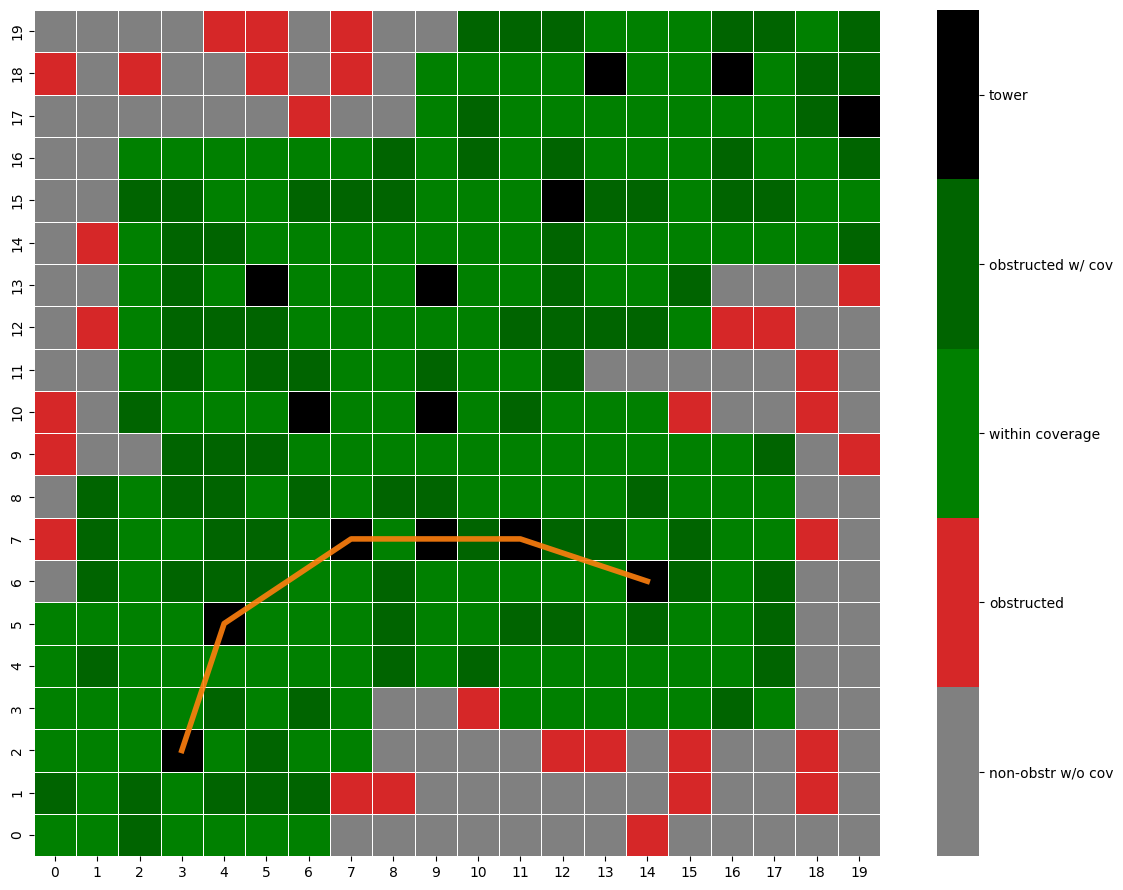

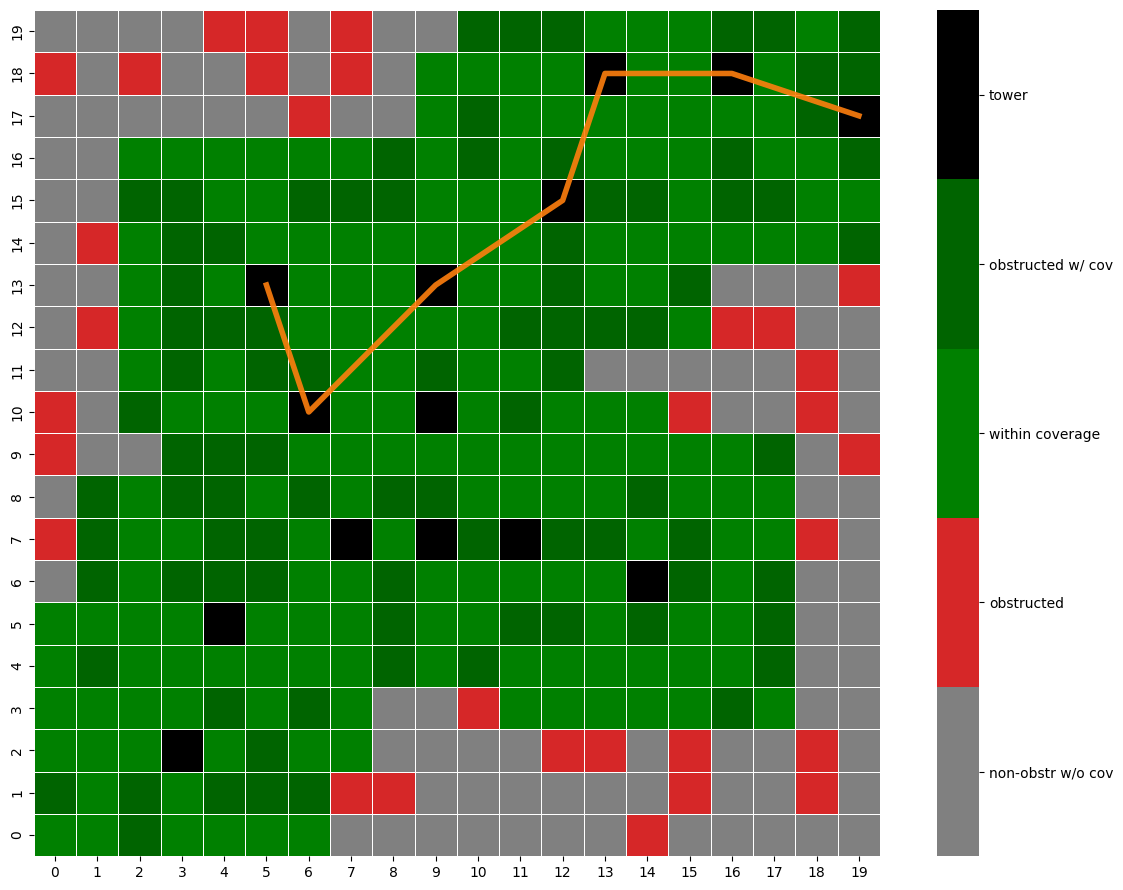

In [11]:
example4.visualize_grid(paths=((3, 2), (14, 6)))
example4.visualize_grid(paths=((19, 17), (5, 13)))

If new towers are added, set `recalculate=True` when executing `most_reliable_path` in order to recalculate the optimal paths.